# quickstart

This quickstart uses a sample of the [NYPD Motor Vehicle Collisions Dataset](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95) dataset


In [8]:
import pandas as pd
import numpy as np
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")
collisions.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,NaN,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",NaN,NaN,67-64 FLEET STREET,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",BEDFORD AVENUE,CAMPUS ROAD,NaN,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [11]:
collisions.shape

(7303, 26)

# `matrix`

The `msno.matrix` nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion


<AxesSubplot:>

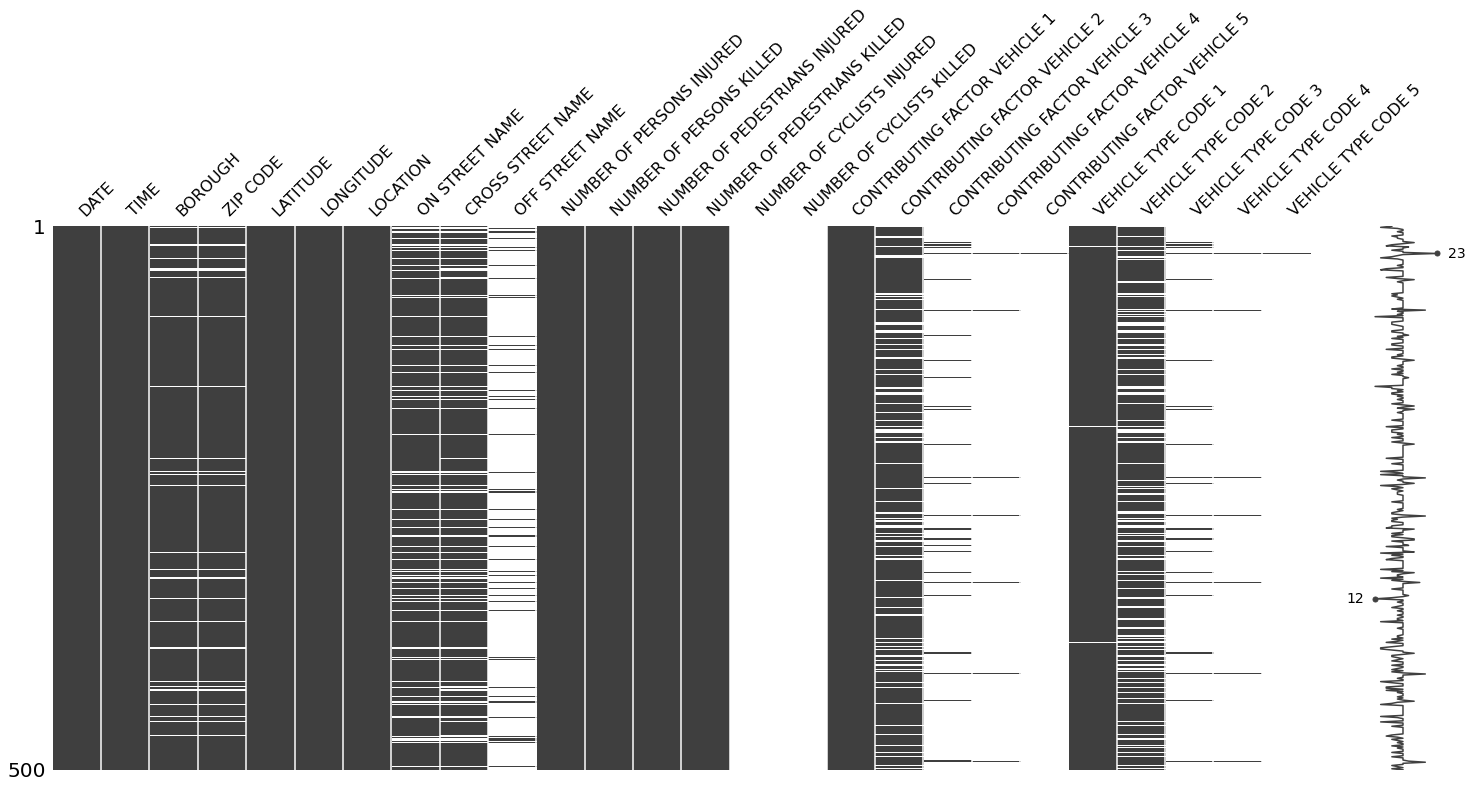

In [12]:
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(500))

At a glance, date, time, the distribution of injuries, and the contribution factor of the first vehicle appear to be completely populated, while geographic information seems mostly complete, but spottier

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

If you are working with time-series data, you can [specify a periodicity](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases) using the `freq` keyword parameter


<AxesSubplot:>

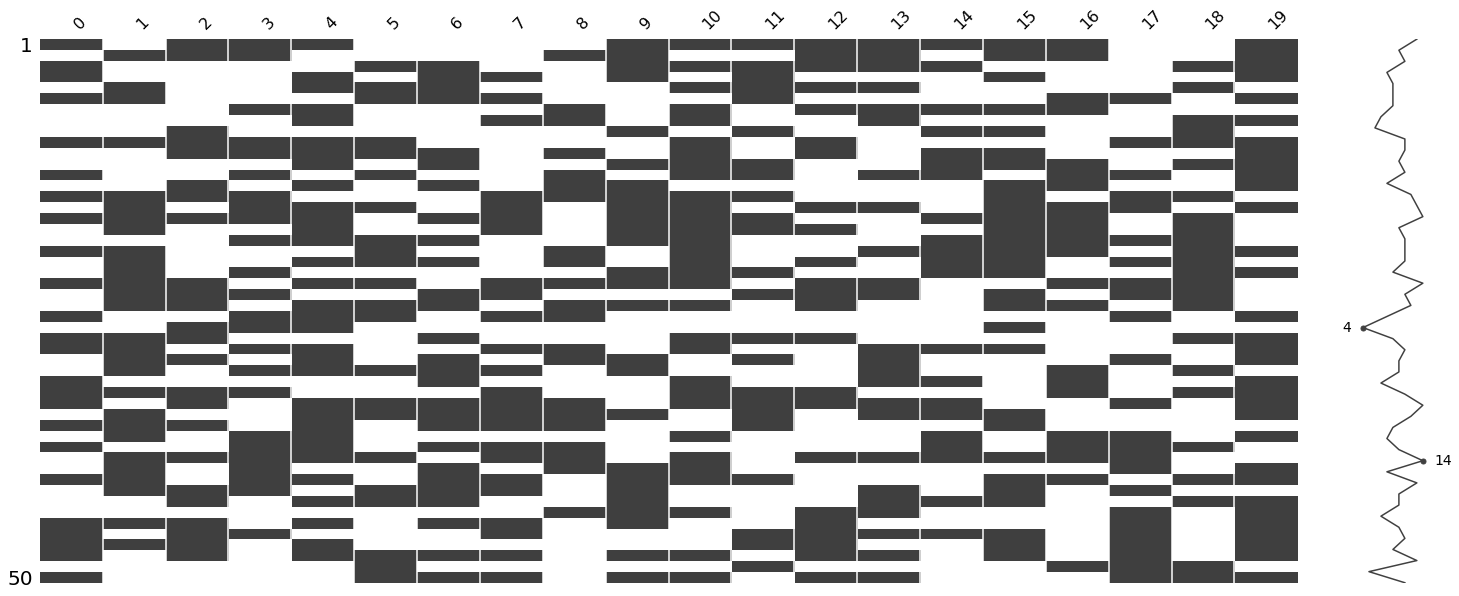

In [22]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)
null_pattern = pd.DataFrame(null_pattern).replace({False: None})
idx = pd.date_range("2011-01-01", periods=50, freq="M")
idx1 = pd.date_range('1/1/2011', '2/1/2015', freq='M')
# print(idx, idx1)
msno.matrix(null_pattern.set_index(idx))

<AxesSubplot:>

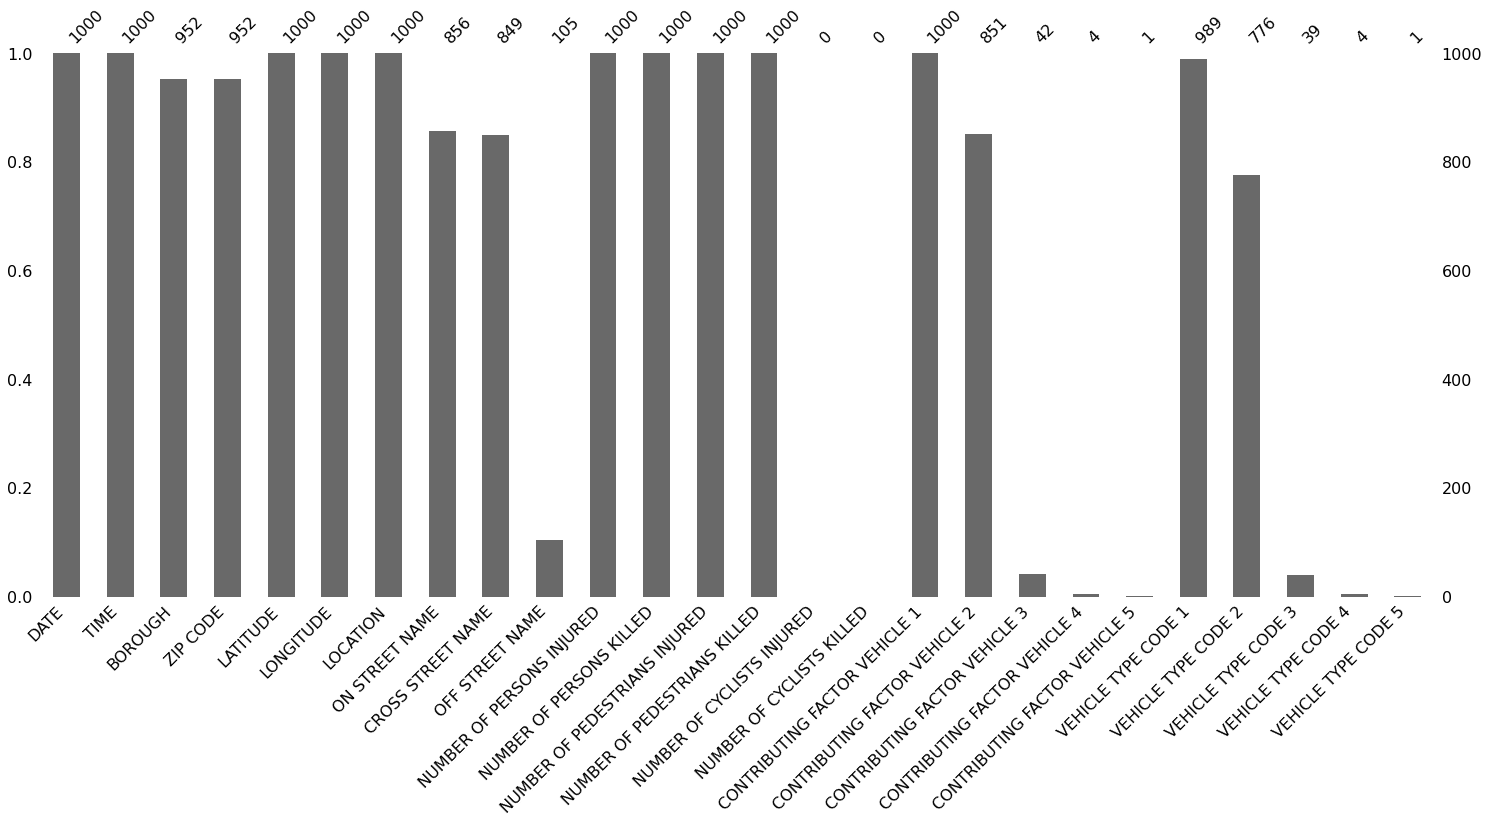

In [7]:
msno.bar(collisions.sample(1000))

<AxesSubplot:>

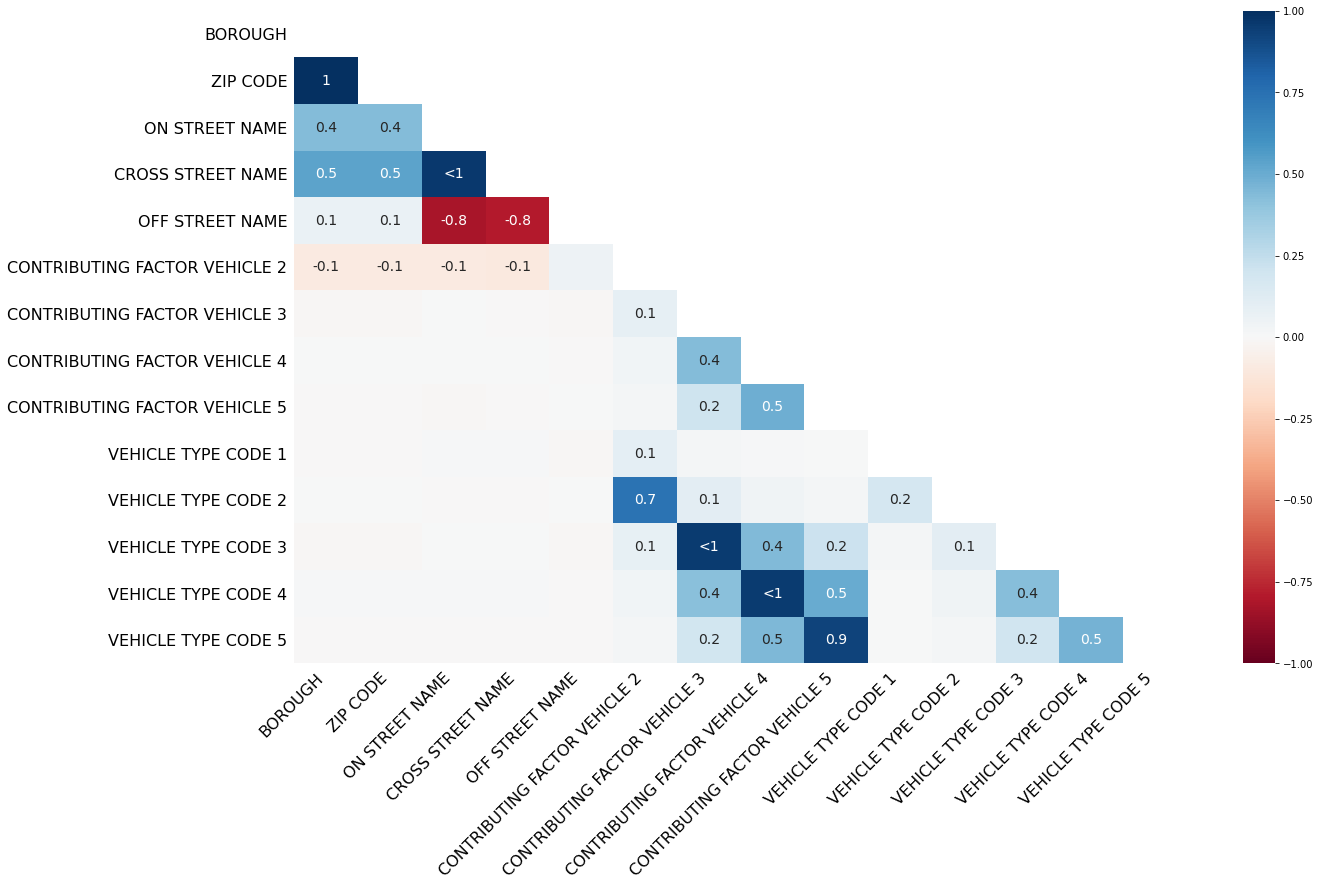

In [8]:
msno.heatmap(collisions)

<AxesSubplot:>

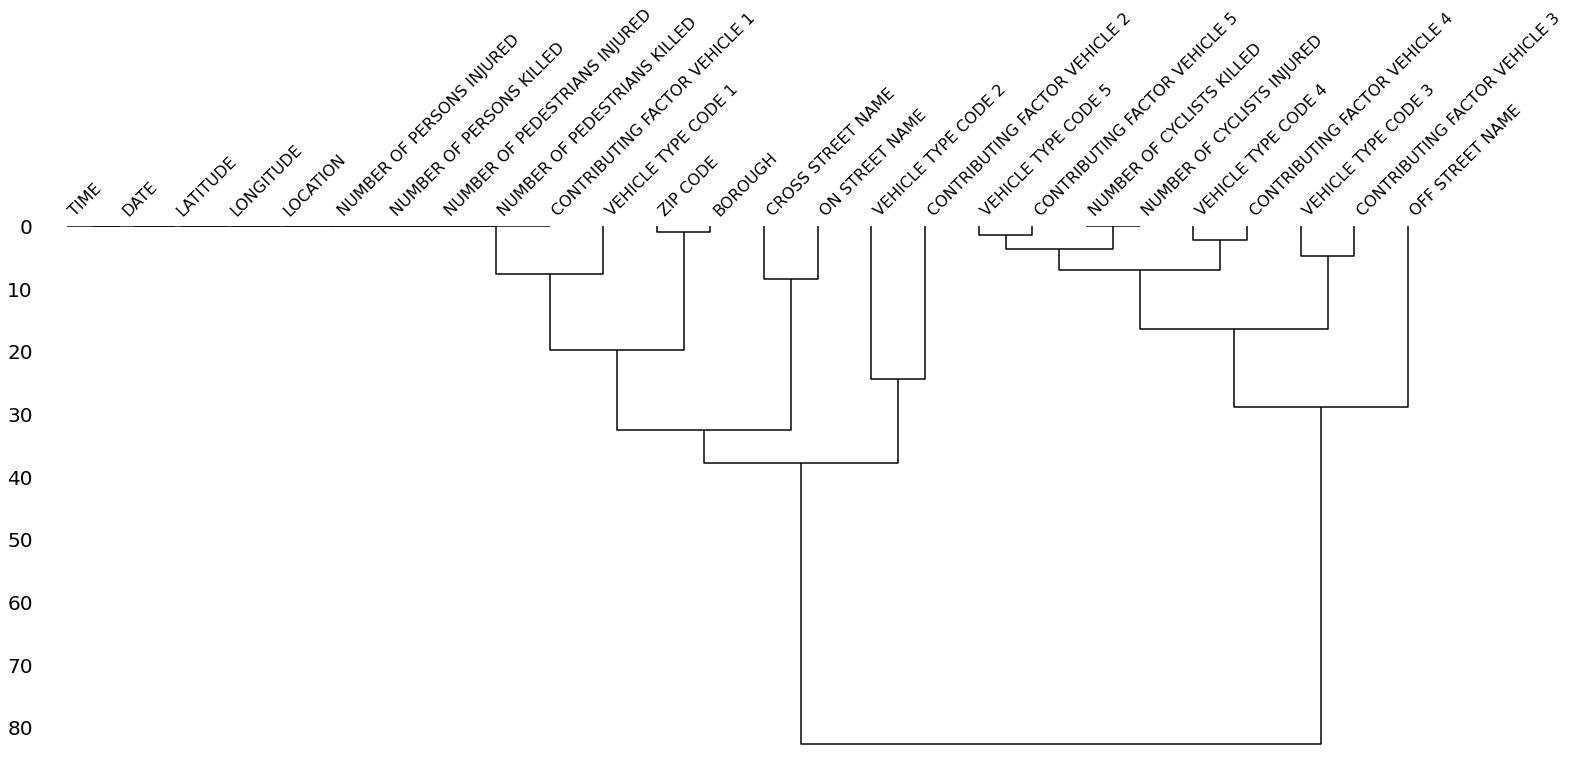

In [9]:
msno.dendrogram(collisions)

# Sorting and filtering

`missingno` also provides utility functions for filtering records in your dataset based on completion. These are
useful in particular for filtering through and drilling down into particularly large datasets whose data nullity
issues might otherwise be very hard to visualize or understand.

Let's first apply a `nullity_filter()` to the data. The `filter` parameter controls which result set we
want: either `filter=top` or `filter=bottom`. The `n` parameter controls the maximum number of columns that you want:
 so for example `n=5` makes sure we get *at most* five results. Finally, `p` controls the percentage cutoff. If
 `filter=bottom`, then `p=0.9`  makes sure that our columns are *at most*  90% complete; if `filter=top` we get
 columns which are *at least* 90% complete.

For example, the following query filtered down to only at most 15 columns which are not completely filled.


<AxesSubplot:>

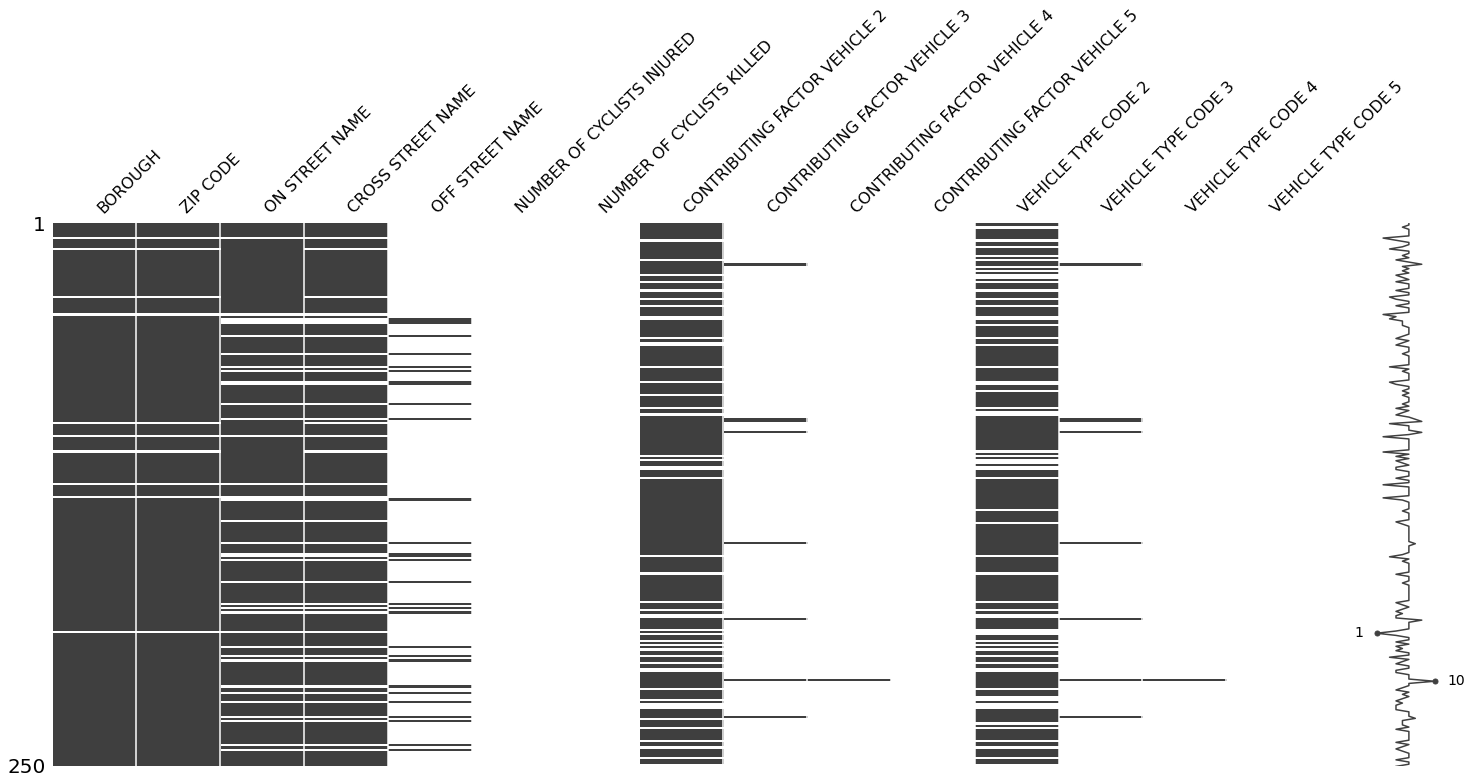

In [11]:
filtered_data = msno.nullity_filter(collisions, filter='bottom', n=15, p=0.999) # or filter='top'
msno.matrix(filtered_data.sample(250))

`nullity_sort()` simply reshuffles your rows by completeness, in either `ascending` or `descending` order. Since it
doesn't affect the underlying data it's mainly useful for `matrix` visualization:


<AxesSubplot:>

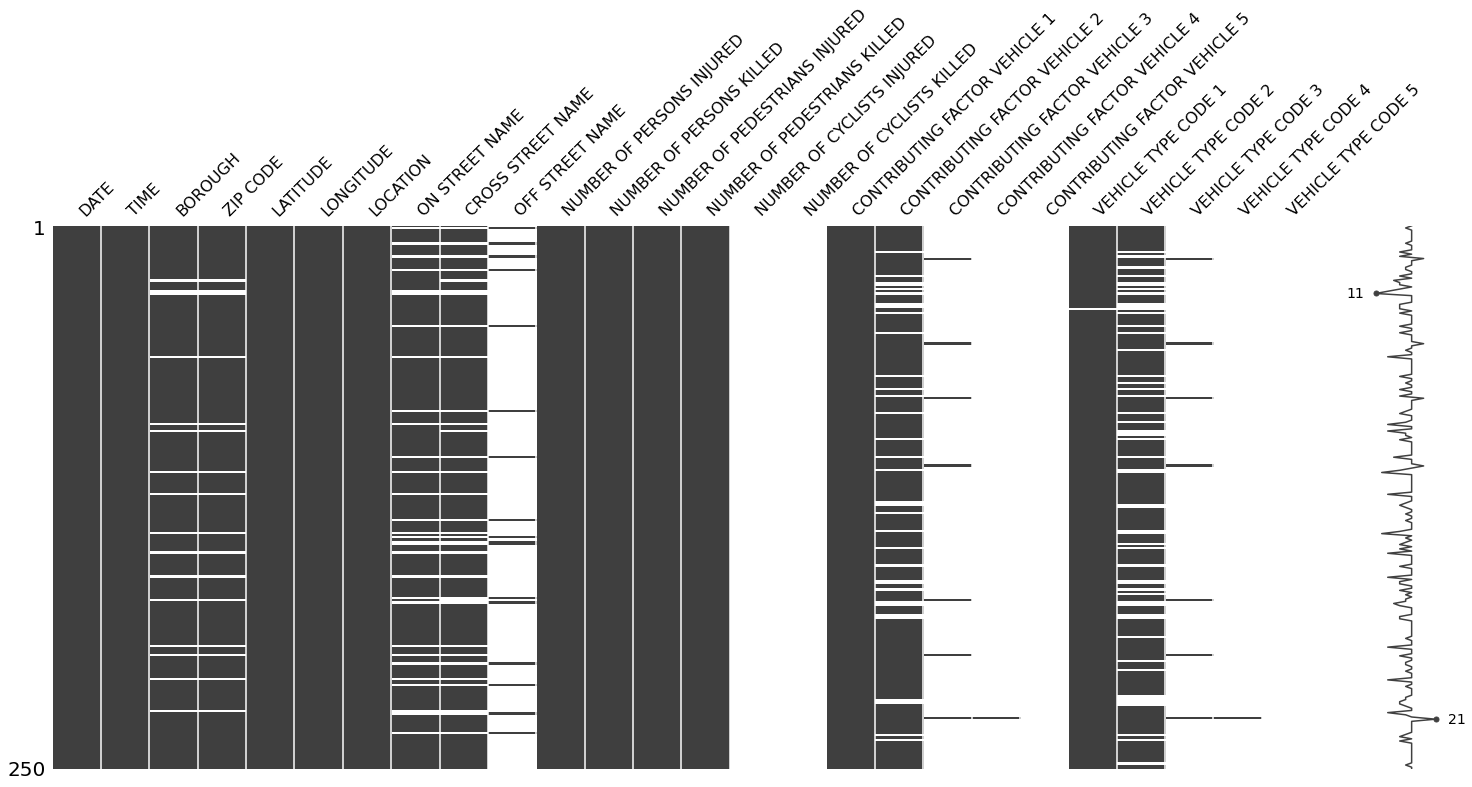

In [13]:
sorted_data = msno.nullity_sort(collisions, sort='descending') # or sort='ascending'
msno.matrix(sorted_data.sample(250))

These methods work inline within the visualization methods themselves. For instance, the following is perfectly valid:


<AxesSubplot:>

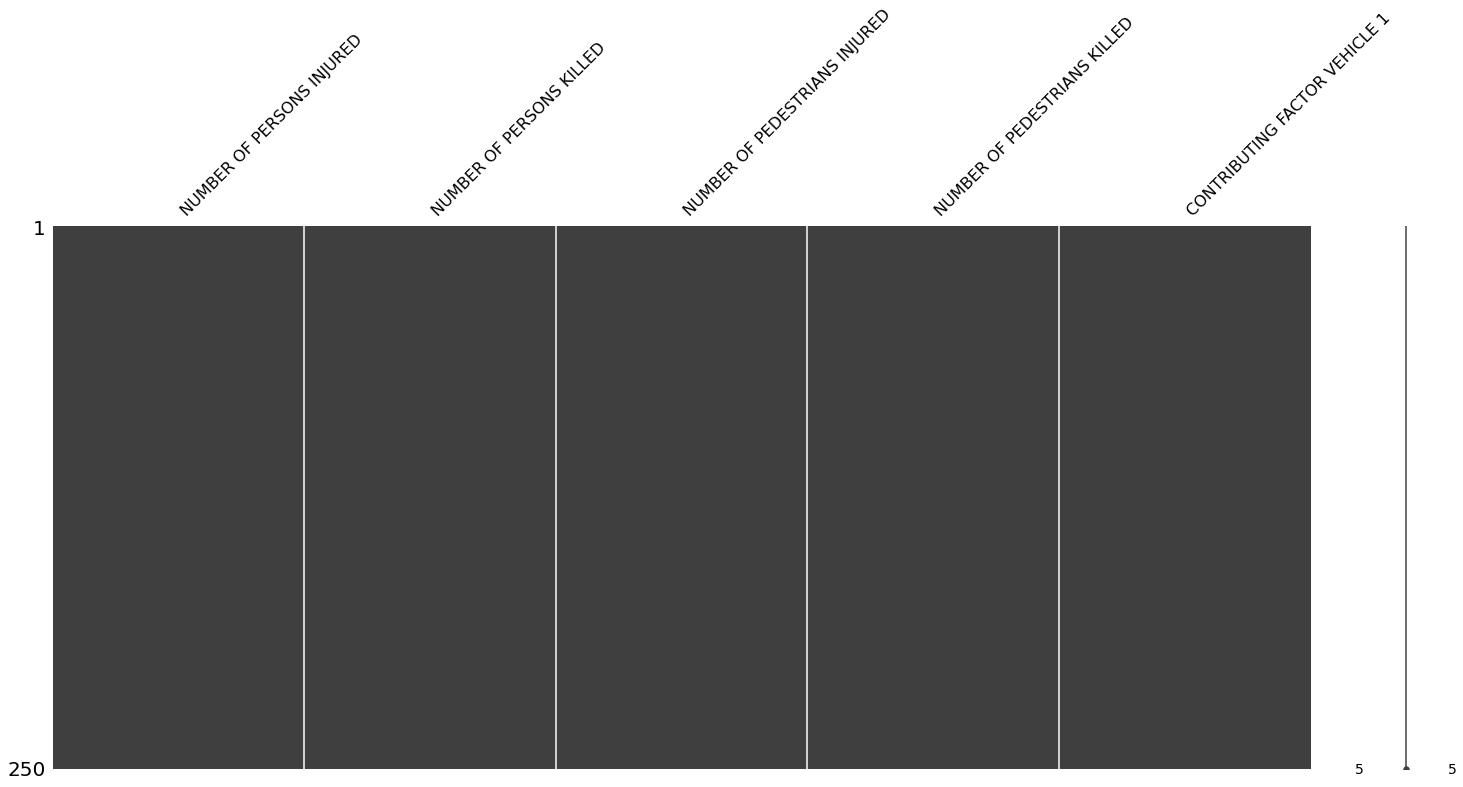

In [14]:
msno.matrix(collisions.sample(250), filter='top', n=5, p=0.9, sort='ascending')

# Manipulation with matplotlib

If you are not satisfied with these admittedly basic configuration parameters, the display can be further manipulated
in any way you like using `matplotlib` post-facto.

The best way to do this is to specify `inline=False`, which will cause `missingno` to return the underlying
`matplotlib.axis.Axis` object of the main plot (e.g. only the matrix is returned when plotting the matrix with the sparkline). Anyone with sufficient knowledge of `matplotlib` operations and [the missingno source code](https://github.com/ResidentMario/missingno/blob/master/missingno/missingno.py)
can then tweak the display to their liking. For example, the following code will bump the size of the dendrogram
visualization's y-axis labels up from `20` to `30`:


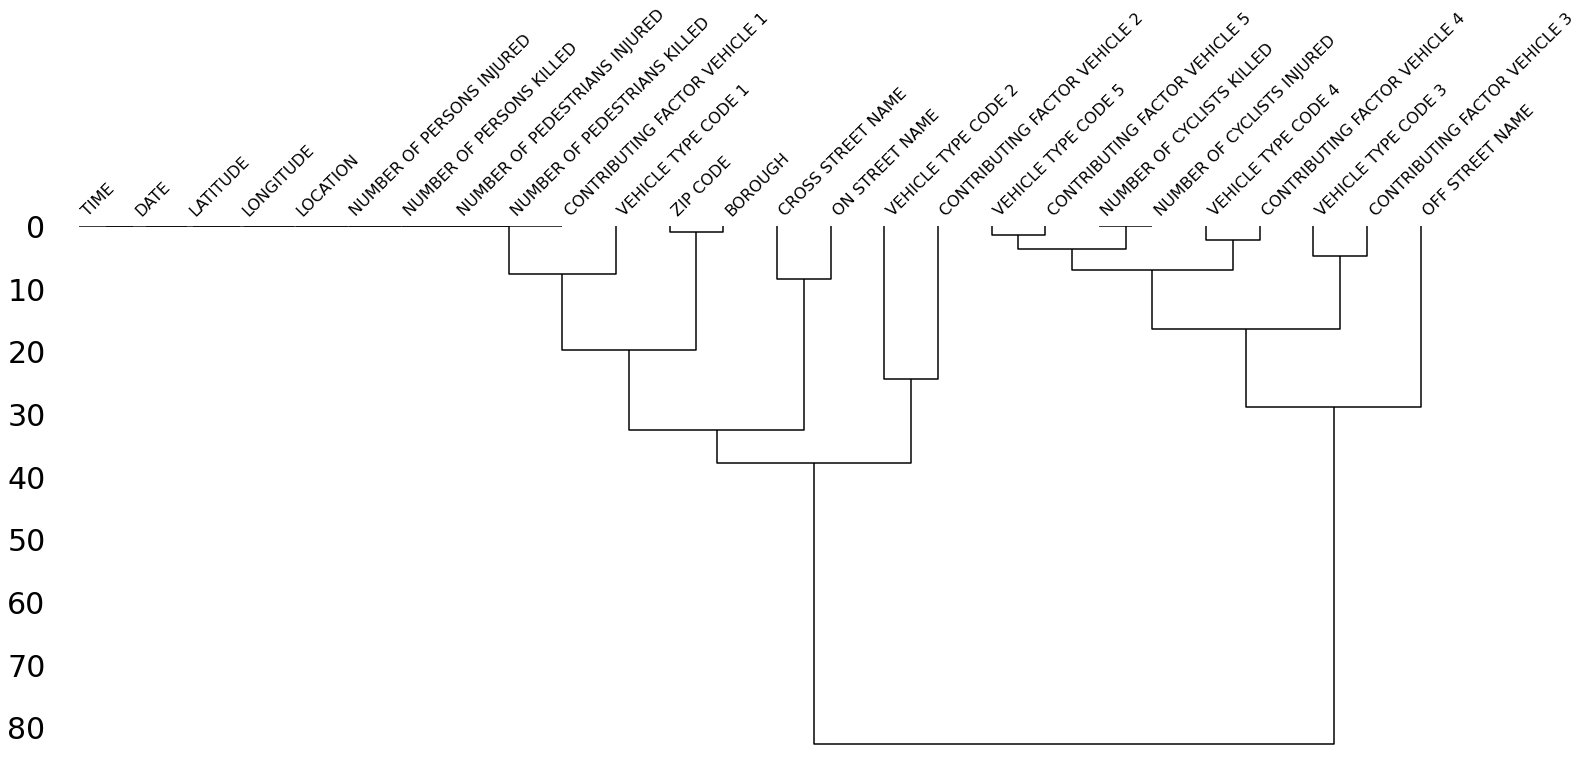

In [23]:
mat = msno.dendrogram(collisions, inline=False)
mat.axes.tick_params(axis='y', labelsize=30)